In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mockdata import *



In [98]:
# #students
# tasklist = ['Opg1','Opg2','Opg3','Opg4']
# taskColNum = 7
# folder = './students'

# data1 = dataStud1
# # Calling DataFrame constructor on list
# df1 = pd.DataFrame(data1[:],columns=colsStud).set_index('Bruker')
# df1

# data2 = dataStud2
# # Calling DataFrame constructor on list
# df2 = pd.DataFrame(data2[:],columns=colsStud).set_index('Bruker')
# df2

,Opg1,Opg2,Opg3,Opg4,Totaltid,Antall feiltrykk,Hvor h*n trengte hjelp
Bruker,,,,,,,
1,20,29,20,10,79,2,[]
2,22,10,20,35,87,2,[Opg3]
3,17,10,16,9,52,0,[]
4,21,19,12,10,62,0,[]
5,19,15,22,26,82,0,[]


In [107]:
#company
tasklist = ['Opg5','Opg6']
taskColNum = 5
folder = './company'

data1 = databed1
# Calling DataFrame constructor on list
df1 = pd.DataFrame(data1[:],columns=colsBed).set_index('Bruker')
df1

data2 = databed2
# Calling DataFrame constructor on list
df2 = pd.DataFrame(data2[:],columns=colsBed).set_index('Bruker')
df2

,Opg5,Opg6,Totaltid,Antall feiltrykk,Hvor h*n trengte hjelp
Bruker,,,,,
1,46,26,72,0,[]
2,5,15,20,0,[]
3,50,22,72,1,[]
4,30,20,50,0,[]
5,57,21,78,1,[]


In [108]:
# #admin
# tasklist = ['Opg7','Opg8']
# taskColNum = 5
# folder = './admin'

# data1 = dataAdmin1
# # Calling DataFrame constructor on list
# df1 = pd.DataFrame(data1[:],columns=colsAdmin).set_index('Bruker')
# df1

# data2 = dataAdmin2
# # Calling DataFrame constructor on list
# df2 = pd.DataFrame(data2[:],columns=colsAdmin).set_index('Bruker')
# df2


# ![title](effectiveness.png)

In [109]:
#reflist

n_tasks = len(tasklist)
n_users = len(data1)

def tasksCompleted(df, data):
    #n tasks completed
    taskDict = dict.fromkeys(tasklist, n_users)
    resList=[]

    # calc n successfull tasks
    for idx, x in enumerate(data):
        count=0
        successfull=0
        for occurence in x[taskColNum]:
            if occurence in tasklist:        
                count += 1
                
                #append to number of people who completed the task
                taskDict[occurence]-= 1
            
        resList.insert(idx, n_tasks - count)
    df["n passed"] = resList
    return taskDict

taskDict1 = tasksCompleted(df1, data1)

taskDict2 = tasksCompleted(df2, data2)



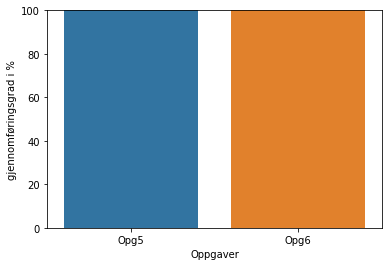

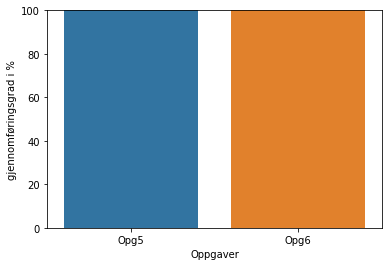

In [110]:
fileCount = 0


def makeEffectiveness(data, taskDict):
    
    #Total number of tasks undertaken
    numTasks = dict.fromkeys(tasklist, len(data))

    effectiveness = dict.fromkeys(tasklist, 0)
    for x in taskDict:
        effectiveness[x] = taskDict[x] / numTasks[x] * 100

    #effectiveness
    rows = list(effectiveness.values())
    cols = list(effectiveness.keys())

    eff = pd.DataFrame([rows],columns=cols)

    # who v/s fare barplot
    sns.barplot(data = eff).set(xlabel="Oppgaver", ylabel="gjennomføringsgrad i %")

    plt.ylim([0, 100])
    
    plt.savefig(folder +'/eff' + str(fileCount) + '.png')
    
    # Show the plot
    plt.show()
    
    return eff
eff1 = makeEffectiveness(data1, taskDict1)
fileCount += 1
eff2 = makeEffectiveness(data2, taskDict2)



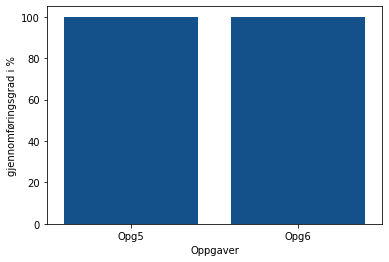

In [111]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# creating subplots
ax = plt.subplots()
  
# plotting columns
ax = sns.barplot(x=tasklist, y=eff2.values[0], color='#f1d282')
ax = sns.barplot(x=tasklist, y=eff1.values[0], color='#00509e')

# colors = {'Iterasjon 2':'#f1d282', 'Iterasjon 1':'#00509e'}         
# labels = list(colors.keys())
# handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
# plt.legend(handles, labels)

  
# renaming the axes
ax.set(xlabel="Oppgaver", ylabel="gjennomføringsgrad i %")
plt.savefig(folder +'/eff' + "_both" + '.png')
# visulaizing illustration
plt.show()


# ![title](efficiency.png)

In [112]:
def timeBasedEff(df):

    results = {}
    for task in tasklist:
        results[task] =df[task].tolist()


    helpList = df["Hvor h*n trengte hjelp"][0:].tolist()

    for ix, i in enumerate(results):
        vals = results[i]
        
        for jx, j in enumerate(helpList):
            if i in j:
                results[i][jx] = 0 / results[i][jx]
            else: 
                results[i][jx] = 1 / results[i][jx]

    #print(results)
    summed = {}
    for task in results:
        SUM = sum(results[task])
        summed[task] = SUM / (n_tasks * n_users)
    
    return summed




0.029


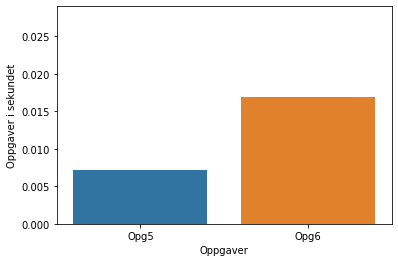

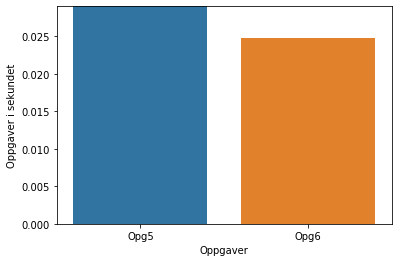

In [113]:
import numpy as np

fileCount = 0

rows1 = list(timeBasedEff(df1).values())
rows2 = list(timeBasedEff(df2).values())
arr = np.concatenate((rows1, rows2))
highest = round(np.amax(arr),3)
print(highest)

def tbeToPlot(df):


    #timebased efficiency
    rows = list(timeBasedEff(df).values())
    cols = list(timeBasedEff(df).keys())


    tbe = pd.DataFrame([rows],columns=cols)


    # who v/s fare barplot
    sns.barplot(data = tbe).set(xlabel="Oppgaver", ylabel="Oppgaver i sekundet")

    plt.ylim([0, highest])
    
    plt.savefig(folder +'/tbe' + str(fileCount) + '.png')
    
    # Show the plot
    plt.show()

    return tbe
tbe1 = tbeToPlot(df1)
fileCount +=1
tbe2 = tbeToPlot(df2)

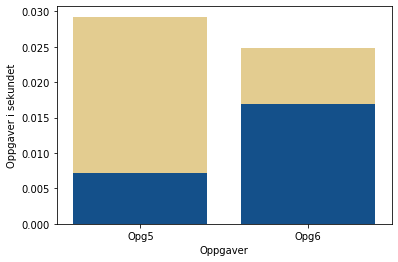

In [114]:
# creating subplots
ax = plt.subplots()
  
# plotting columns
ax = sns.barplot(x=tasklist, y=tbe2.values[0], color='#f1d282')
ax = sns.barplot(x=tasklist, y=tbe1.values[0],  color='#00509e')

# colors = {'itt2':'purple', 'itt1':'green'}         
# labels = list(colors.keys())
# handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
# plt.legend(handles, labels)

  
# renaming the axes
ax.set(xlabel="Oppgaver", ylabel="Oppgaver i sekundet")
plt.savefig(folder +'/tbe' + '_both' + '.png')
# visulaizing illustration
plt.show()

In [32]:

#example from online
test = [1, 0.5, 0.3, 0]
n = 1
u = 4

summed = {}
SUM = sum(test)
summed["res"] = SUM / (n * u)

print(summed)


{'res': 0.45}
